### TODO

- Add support for any language (preferance to indic languages)
- Fix the text size issue, it should take a size based on the width occupied
- Center the text & handle text wrapping better
- Comment & clean the code
- Move the code to a script inside code repo
- Create a static application & host it in gramener site
- Create templates for other GIFs, make the code modular

In [1]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import cv2
import textwrap
from typing import List
from pygifsicle import optimize
from PIL import Image, ImageDraw, ImageFont

%matplotlib inline

In [2]:
from pathlib import Path
CWD = Path('.')
DATA = CWD/'data'
OUT = CWD/'out'
!ls {DATA}

'covid-spread - social-distance.csv'   fonts   gifs


In [3]:
def wrapper(text: str, width:int=15) -> str:
    return "\n".join(textwrap.wrap(text, width=width))

def draw_image(image: np.ndarray, captions:List[dict], F: dict) -> np.ndarray:
    _image = Image.fromarray(image)
    draw = ImageDraw.Draw(_image)
    # print(draw.textsize(text, font=font))
    
    for cap in captions:
        font = ImageFont.truetype(font=str(F['family']), size=cap['font_size'])
        draw.text(cap['point'], cap['caption'], fill=cap['fill'], font=font)
    
    return np.array(_image)

def giffer(file: Path, content: dict, F: dict, save: str='test.gif') -> None:
    gif = io.mimread(file)
    L = []
    
    for i,frame in enumerate(gif):
        idx = str(i)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2RGB)
        if idx in content:
            L.append(draw_image(frame, captions=content[idx]['captions'], F=F))
        else:
            L.append(frame)
            
    io.mimwrite(OUT/save, L, duration=[0.18]*26 + [1.5]*2 + [3]*5)
    optimize(str(OUT/save))

In [12]:
# English
C0 = "OR..."
C1 = "RAHUL DIDN'T GO TO PLAY CRICKET"
C2 = "SWATI SKIPPED YOGA CLASS"
C3 = "AARTI PRAYED AT HOME!"
C4 = "STAYED HOME"

# Hindi
HC0 = "या..."
HC1 = "राहुल क्रिकेट खेलने नहीं गया"
HC2 = "शबनम योग क्लास के लिए नहीं गई"
HC3 = "आरती ने घर पर प्रार्थना की!"
HC4 = "नेटफ्लिक्स मूवी"

# Tamil
TC0 = "அல்லது..."
TC1 = "அகிலன் கிரிக்கெட் விளையாட செல்லவில்லை"
TC2 = "மோஜி நடன பயிற்சிக்கு செல்வதைத் தவிர்த்தார்"
TC3 = "மலர் வீட்டில் பிரார்த்தனை செய்தார்"
TC4 = "அமேசான் பிரைம் திரைப்படம்"

# Gujurati
GC0 = "અથવા.."
GC1 = "રાહુલ ક્રિકેટ રમવા ના ગયો"
GC2 = "શબનમ યોગા ક્લાસ નો ગઈ"
GC3 = "આરતીએ ઘરે પ્રાર્થના કરી!"
GC4 = "ઘરે રહ્યા"

# Oriya
OC0 = "କିମ୍ବା.."
OC1 = "ଏହି ବ୍ୟକ୍ତି ଘରୁ କାମ କରିଥିଲେ |"
OC2 = "ଏହି ବ୍ୟକ୍ତି କ୍ରିକେଟ୍ ଖେଳିବାକୁ ଯାଇନଥିଲେ |"
OC3 = "ବାହାରକୁ ଭ୍ରମଣ କରିନଥିଲେ |"
OC4 = "ଘରେ ରହିଲେ |"

# AP
AC0 = "లేదా..."
AC1 = "ఈ వ్యక్తి ఇంటి నుండి పనిచేశాడు"
AC2 = "సలీం ఇంటి నుండి దేవుణ్ణి ప్రార్థించాడు"
AC3 = "ఆమె కరోనా కోసం పరీక్షించబడింది"
AC4 = "తన వివాహాన్ని వాయిదా వేసింది"

# AP
AC0 = "లేదా..."
AC1 = "ఈ వ్యక్తి ఇంటి నుండి పనిచేశాడు"
AC2 = "సలీం ఇంటి నుండి దేవుణ్ణి ప్రార్థించాడు"
AC3 = "ఆమె కరోనా కోసం పరీక్షించబడింది"
AC4 = "తన వివాహాన్ని వాయిదా వేసింది"

In [19]:
# structure
content = {
    "27": {
        'captions': [
            {'caption': wrapper(OC0), 'point': (475, 275), 'fill': (0,0,0), 'font_size': 150}
    ]},
    "29": {
        'captions': [
            {'caption': wrapper(OC1), 'point': (190, 100), 'fill': (0,0,0), 'font_size': 30}
    ]},
    "30": {
        'captions': [
            {'caption': wrapper(OC1), 'point': (190, 100), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC2), 'point': (525, 100), 'fill': (0,0,0), 'font_size': 30}
    ]},
    "31": {
        'captions': [
            {'caption': wrapper(OC1), 'point': (190, 100), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC2), 'point': (525, 100), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC3), 'point': (415, 570), 'fill': (0,0,0), 'font_size': 30}
    ]},
    "32": {
        'captions': [
            {'caption': wrapper(OC1), 'point': (190, 100), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC2), 'point': (525, 100), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC3), 'point': (415, 570), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC4), 'point': (820, 640), 'fill': (0,0,0), 'font_size': 30}
    ]},
    "33": {
        'captions': [
            {'caption': wrapper(OC1), 'point': (190, 100), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC2), 'point': (525, 100), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC3), 'point': (415, 570), 'fill': (0,0,0), 'font_size': 30},
            {'caption': wrapper(OC4), 'point': (820, 640), 'fill': (0,0,0), 'font_size': 30}
    ]},
}

FONT = {
    'family': DATA/'fonts'/'oriya'/'BalooBhaina2-SemiBold.ttf'
}

In [22]:
ln = 'test'

In [26]:
giffer(DATA/'gifs'/'covid.gif', content, FONT, f'{ln}.gif')

In [24]:
!ls

2020-24-03_Image-Template.ipynb  code  data  out


In [25]:
!ffmpeg -i out/test.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" out/test.mp4

ffmpeg version 4.1.3 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/srm/anaconda3/envs/giffer --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1556785800657/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 22.100 / 56. 22.100
  libavcodec     58. 35.100 / 58. 35.100
  libavformat    58. 20.100 / 58. 20.100
  libavdevice    58.  5.100 / 58.  5.100
  libavfilter     7. 40.101 /  7. 40.101
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  3.100 /  5.  3.100
  libswresample   3.  3.100 /  3.  3.100
  libpostproc    55.  3.100 / 55.  3.100
Input #0, gif, from 'out/test.gif':
  Duration: N/A, bi

### Experiment

In [23]:
imgs = io.mimread(DATA/'distance.gif')

In [24]:
one = imgs[32]

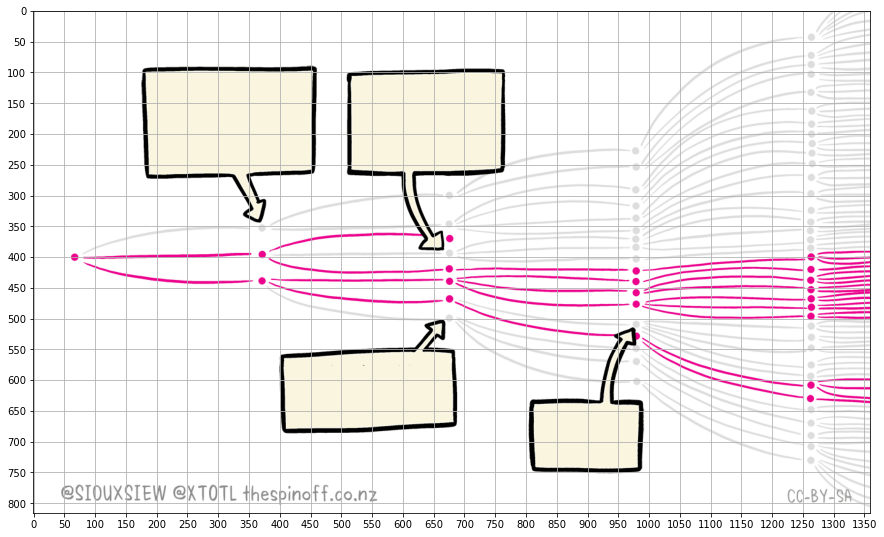

In [25]:
fig, ax = plt.subplots(figsize=(15,15))
ax.xaxis.set_ticks(ticks=np.arange(0, 1360, 50))
ax.yaxis.set_ticks(ticks=np.arange(0, 820, 50))
ax.grid(b=True)
plt.imshow(one)

In [26]:
one.shape

(816, 1360, 4)